<a href="https://colab.research.google.com/github/vishwaram47/Deep-Learning-Lab/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Model,datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]
x_train.shape

(60000, 28, 28, 1)

In [ ]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

**LeNet5 Model**

In [ ]:
model=Sequential(
    [Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=x_train[0].shape,padding='same'),
    AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='same'),
    AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    Flatten(),
    Dense(120,activation='tanh'),
    Dense(84,activation='tanh'),
    Dense(10,activation='softmax'),]
)

In [ ]:
model.compile(optimizer='adam',loss=categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 7, 7, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               9

In [ ]:
history=model.fit(x_train,y=y_train,epochs=20,validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 55s 27ms/step - loss: 0.1428 - accuracy: 0.9567 - val_loss: 0.0625 - val_accuracy: 0.9807
Epoch 2/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0630 - accuracy: 0.9805 - val_loss: 0.0549 - val_accuracy: 0.9813
Epoch 3/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0495 - accuracy: 0.9844 - val_loss: 0.0496 - val_accuracy: 0.9842
Epoch 4/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0486 - val_accuracy: 0.9855
Epoch 5/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0442 - val_accuracy: 0.9865
Epoch 6/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0526 - val_accuracy: 0.9848
Epoch 7/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0440 -

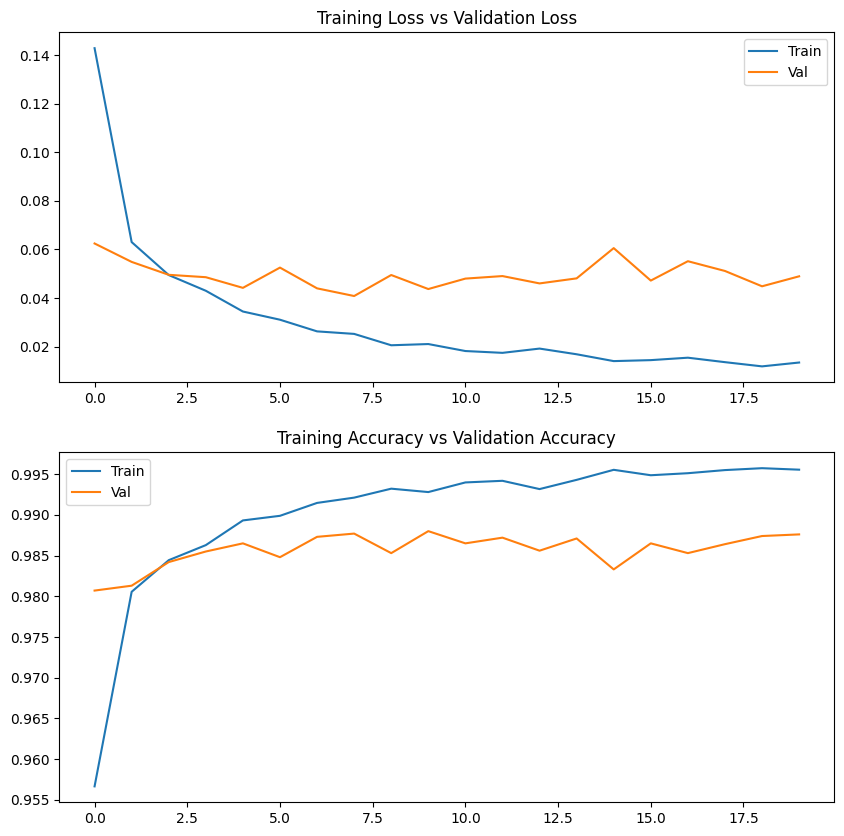

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [ ]:
y_pred=model.predict(x_test)
max_values = np.max(y_pred, axis=1)
mask = (y_pred == max_values[:, None])
y_pred = np.where(mask, 1, 0)

313/313 [==============================] - 3s 11ms/step


In [ ]:
class_labels = np.argmax(y_test, axis=1)
pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
accuracy= accuracy_score(pred_labels,class_labels)
print("Accuracy:",accuracy)

Accuracy: 0.9876


In [ ]:
cm=confusion_matrix(class_labels,pred_labels)
print(cm)

[[ 973    0    1    0    0    1    4    1    0    0]
 [   3 1123    2    1    0    0    1    1    3    1]
 [   0    1 1023    2    1    0    0    3    2    0]
 [   0    0    0 1004    0    2    0    0    4    0]
 [   0    0    0    0  964    0    5    2    2    9]
 [   1    0    0    9    0  879    3    0    0    0]
 [   2    2    4    0    1    0  947    0    2    0]
 [   1    0    7    4    0    1    0 1013    0    2]
 [   1    0    5    6    0    0    1    0  957    4]
 [   0    0    1    0    4    3    1    4    3  993]]


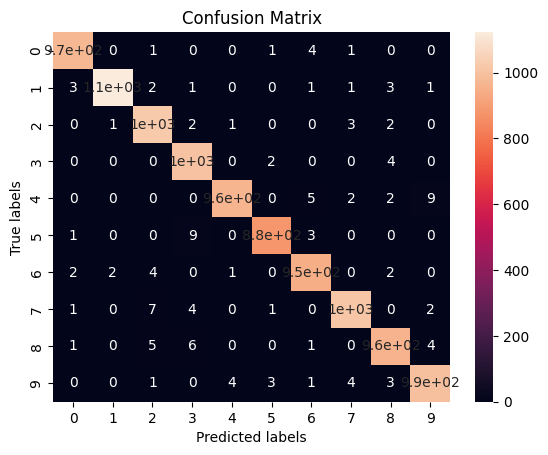

In [ ]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

LeNet model with 2 more Convolution and Average pooling layers which now it is essentially **LeNet7**

In [ ]:
model2=Sequential(
    [Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=x_train[0].shape,padding='same'),
    AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='same'),
    AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    Conv2D(filters=10,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='same'),#extra 2 Convolution and pooling layers
    AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    Conv2D(filters=10,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='same'),
    AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    Flatten(),
    Dense(120,activation='tanh'),
    Dense(84,activation='tanh'),
    Dense(10,activation='softmax'),]
)

In [ ]:
model2.compile(optimizer='adam',loss=categorical_crossentropy,metrics=['accuracy'])

In [ ]:
history2=model2.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 52s 27ms/step - loss: 0.2736 - accuracy: 0.9137 - val_loss: 0.0922 - val_accuracy: 0.9692
Epoch 2/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0894 - accuracy: 0.9731 - val_loss: 0.0643 - val_accuracy: 0.9791
Epoch 3/20
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0718 - accuracy: 0.9779 - val_loss: 0.0604 - val_accuracy: 0.9809
Epoch 4/20
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0622 - accuracy: 0.9806 - val_loss: 0.0585 - val_accuracy: 0.9811
Epoch 5/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0538 - accuracy: 0.9832 - val_loss: 0.0482 - val_accuracy: 0.9853
Epoch 6/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0528 - val_accuracy: 0.9841
Epoch 7/20
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0430 -

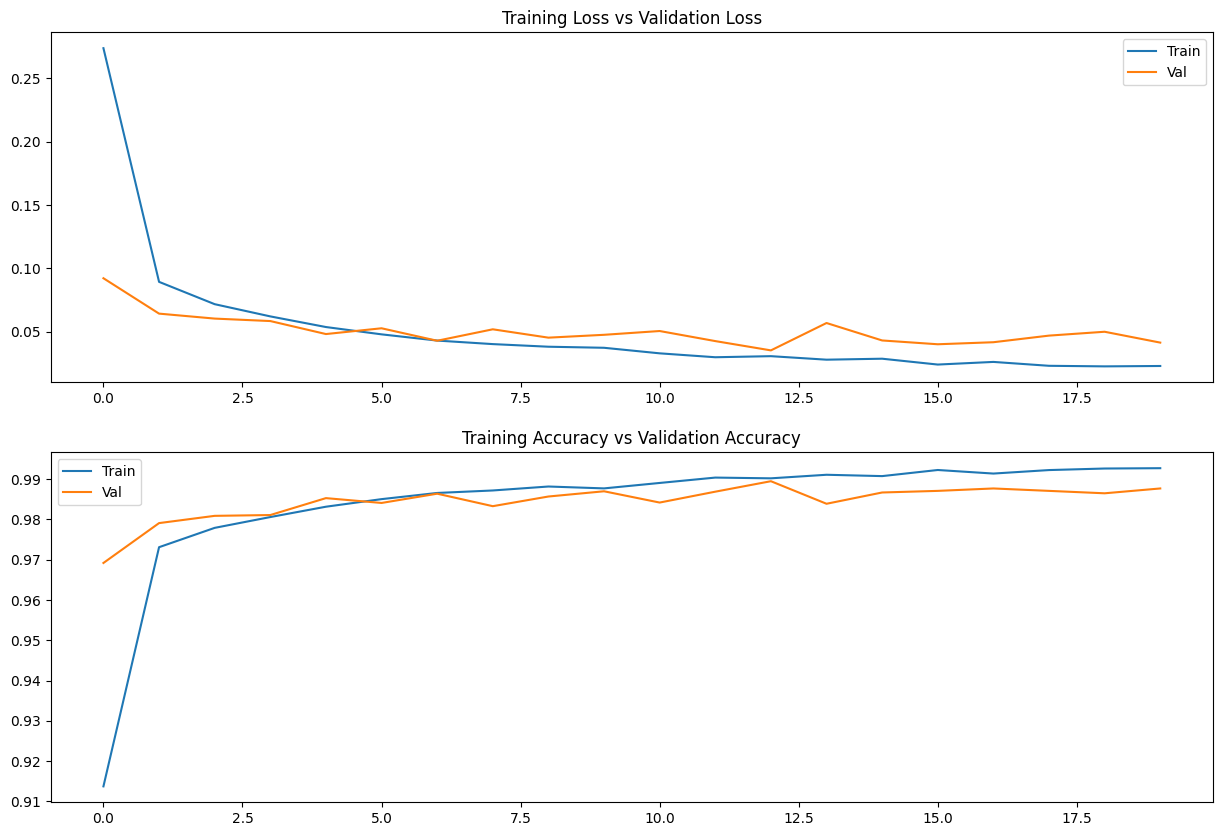

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
axs[0].plot(history2.history['loss'])
axs[0].plot(history2.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history2.history['accuracy'])
axs[1].plot(history2.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [ ]:
y_pred=model2.predict(x_test)
max_values = np.max(y_pred, axis=1)
mask = (y_pred == max_values[:, None])
y_pred = np.where(mask, 1, 0)

313/313 [==============================] - 7s 22ms/step


In [ ]:
class_labels = np.argmax(y_test, axis=1)
pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
accuracy= accuracy_score(pred_labels,class_labels)
print("Accuracy:",accuracy)

Accuracy: 0.9877


In [ ]:
cm=confusion_matrix(pred_labels,class_labels)
print(cm)

[[ 976    0    1    0    0    1    7    0    5    3]
 [   0 1127    1    0    0    0    4    0    1    1]
 [   0    1 1025    1    0    0    0    4    4    1]
 [   0    0    0 1001    0   10    0    1    1    0]
 [   0    1    1    0  971    0    1    1    1    5]
 [   1    0    0    2    0  876    1    0    0    2]
 [   1    1    0    0    3    3  943    0    0    0]
 [   1    3    1    1    1    1    0 1020    3    6]
 [   0    2    3    5    1    1    2    0  955    8]
 [   1    0    0    0    6    0    0    2    4  983]]


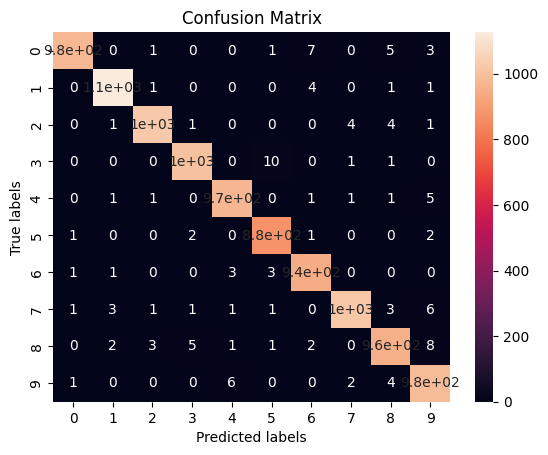

In [ ]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

**Comparison**

If we see only the accuracy then LeNet7 isn't a better model than LeNet5 because if you see LeNEt5's accuracy is 98.76% and LeNet7's accuracy is 98.76%. Only a 0.01% increase in accuracy. And it is not worth 4 more layers. it only increases the computation time and space required.

Both models are confusing different classes.

LeNet5 confuses 3rd with the 8th class.

LeNet7 confuses 6th with the 4th class and 1st and the 7th class a lot.

So LeNet5 is itself a better model.
